# Introduction to Machine Learning and AI

# Final-Project ：Thinking about Purchasing Stock  Case Study

# Group 2 : Qi Zhang && Xinmeng Liu

## Import relevant packages

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sn
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

plt.style.use('ggplot')


## Import the data set

In [2]:
FILE1 = "csv_file\Apple.csv"
FILE2 = "csv_file\Microsoft.csv"
df_apple = pd.read_csv(FILE1)
df_microsoft = pd.read_csv(FILE2)

## Data Cleansing

In [322]:
print(df_apple.isnull().any())
print(df_microsoft.isnull().any())
# No value is missing in these 2 data sets

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


### Drop 2020 data

In [3]:
df_apple = df_apple[df_apple["Date"].str.contains("2020") == False]
df_microsoft = df_microsoft[df_microsoft["Date"].str.contains("2020") == False]
# The 2020 data is not needed at all due to COVID-19 impacts.

### Turn the date into index

In [4]:
df_apple['Date'] = pd.to_datetime(df_apple.Date, format='%Y-%m-%d')
df_apple.index = df_apple['Date']

df_microsoft['Date'] = pd.to_datetime(df_microsoft.Date, format='%Y-%m-%d')
df_microsoft.index = df_microsoft['Date']

### The basic info of Apple stock

In [325]:
print(df_apple.info())
print(df_apple.describe())
print(df_apple.head())
print(df_apple.corr())
print(df_apple.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10248 entries, 1980-12-12 to 2022-08-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10248 non-null  datetime64[ns]
 1   Open       10248 non-null  float64       
 2   High       10248 non-null  float64       
 3   Low        10248 non-null  float64       
 4   Close      10248 non-null  float64       
 5   Adj Close  10248 non-null  float64       
 6   Volume     10248 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 640.5 KB
None
               Open          High           Low         Close     Adj Close  \
count  10248.000000  10248.000000  10248.000000  10248.000000  10248.000000   
mean      13.199479     13.339672     13.061867     13.206506     12.570622   
std       30.388313     30.738308     30.062666     30.418153     30.107344   
min        0.049665      0.049665      0.049107      0.04910

### The basic info of Microsoft stock

In [326]:
print(df_microsoft.info())
print(df_microsoft.describe())
print(df_microsoft.head())
print(df_microsoft.corr())
print(df_microsoft.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8922 entries, 1986-03-13 to 2022-08-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8922 non-null   datetime64[ns]
 1   Open       8922 non-null   float64       
 2   High       8922 non-null   float64       
 3   Low        8922 non-null   float64       
 4   Close      8922 non-null   float64       
 5   Adj Close  8922 non-null   float64       
 6   Volume     8922 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 557.6 KB
None
              Open         High          Low        Close    Adj Close  \
count  8922.000000  8922.000000  8922.000000  8922.000000  8922.000000   
mean     39.405219    39.813412    38.982464    39.412798    34.235384   
std      59.241808    59.807334    58.622170    59.252423    59.453134   
min       0.088542     0.092014     0.088542     0.090278     0.056745   
25%    

### check the correlations through heatmap 

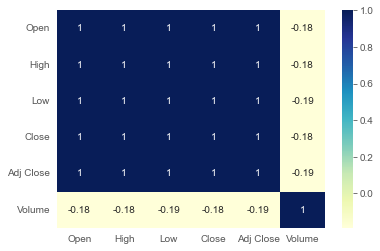

In [327]:
dataplot = sn.heatmap(df_apple.corr(), cmap='YlGnBu', annot=True)

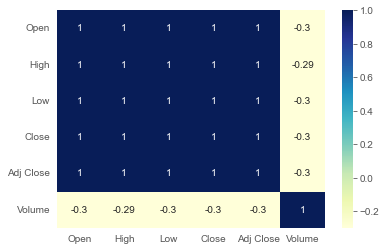

In [328]:
dataplot = sn.heatmap(df_microsoft.corr(), cmap='YlGnBu', annot=True)

# Analysis

## Check the trend by close price

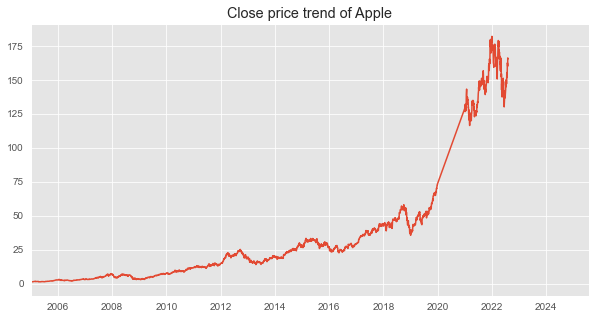

In [329]:
plt.figure(figsize=(10, 5))
plt.title('Close price trend of Apple')
plt.grid(True)
dstart = datetime.datetime(2005, 1, 1)
dstop = datetime.datetime(2025, 8, 1)
plt.xlim(dstart, dstop)
plt.plot(df_apple['Close'], label='Close Price history')

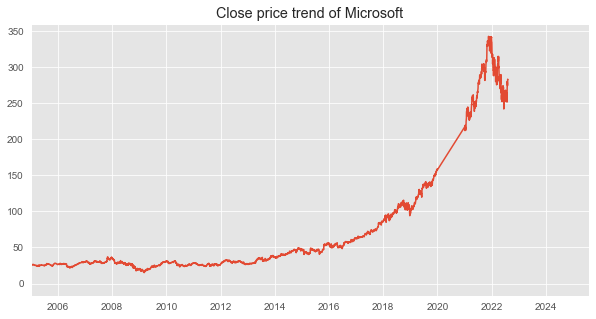

In [330]:
plt.figure(figsize=(10, 5))
plt.title('Close price trend of Microsoft')
plt.grid(True)
dstart = datetime.datetime(2005, 1, 1)
dstop = datetime.datetime(2025, 8, 1)
plt.xlim(dstart, dstop)
plt.plot(df_microsoft['Close'], label='Close Price history')

## Check the trend by MA of adjusted price

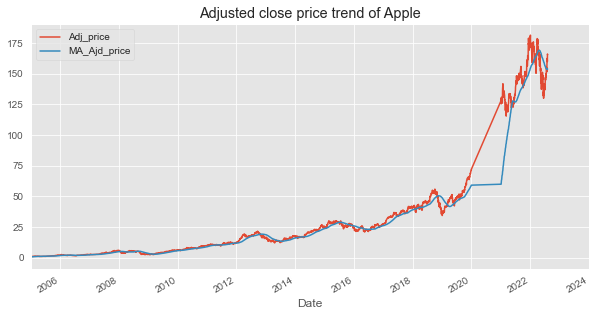

In [331]:
adj_price = df_apple['Adj Close']

plt.figure(figsize=(10, 5))
plt.title('Adjusted close price trend of Apple')
plt.grid(True)
MA_adj_price = adj_price.rolling(window=100).mean()
dstart = datetime.datetime(2005, 1, 1)
dstop = datetime.datetime(2024, 1, 1)
plt.xlim(dstart, dstop)
adj_price.plot(label='Adj_price')
MA_adj_price.plot(label='MA_Ajd_price')
plt.legend()
#plt.savefig(r'C:\Users\Marsy\Desktop\1.png',dpi=300, bbox_inches='tight')

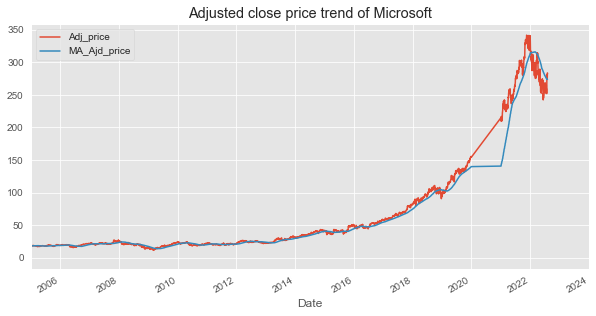

In [332]:
adj_price = df_microsoft['Adj Close']

plt.figure(figsize=(10, 5))
plt.title('Adjusted close price trend of Microsoft')
plt.grid(True)
MA_adj_price = adj_price.rolling(window=100).mean()
dstart = datetime.datetime(2005, 1, 1)
dstop = datetime.datetime(2024, 1, 1)
plt.xlim(dstart, dstop)
adj_price.plot(label='Adj_price')
MA_adj_price.plot(label='MA_Ajd_price')
plt.legend()
# plt.savefig(r'C:\Users\Marsy\Desktop\2.png',dpi=300, bbox_inches='tight')

## Calculate the Rate of Return by Adj Close

<AxesSubplot:title={'center':'Rate of Return of Apple'}, xlabel='Date'>

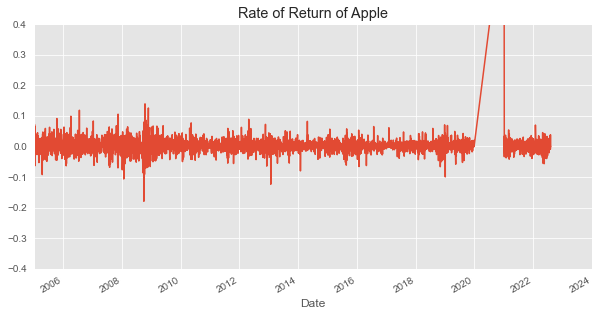

In [333]:
adj_price = df_apple['Adj Close']

plt.figure(figsize=(10, 5))
plt.title('Rate of Return of Apple')
plt.grid(True)
AP_ror = adj_price / adj_price.shift(1) - 1
dstart = datetime.datetime(2005, 1, 1)
dstop = datetime.datetime(2024, 1, 1)
plt.xlim(dstart, dstop)
plt.ylim([-0.4, 0.4])
AP_ror.plot()

<AxesSubplot:title={'center':'Rate of Return of Microsoft'}, xlabel='Date'>

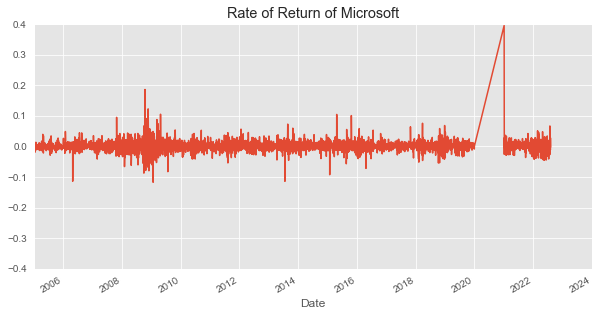

In [334]:
adj_price = df_microsoft['Adj Close']

plt.figure(figsize=(10, 5))
plt.title('Rate of Return of Microsoft')
plt.grid(True)
MS_ror = adj_price / adj_price.shift(1) - 1
dstart = datetime.datetime(2005, 1, 1)
dstop = datetime.datetime(2024, 1, 1)
plt.xlim(dstart, dstop)
plt.ylim([-0.4, 0.4])
MS_ror.plot()

## Check the correlation between stocks

array([[<AxesSubplot:xlabel="('Apple Adj Close',)", ylabel="('Apple Adj Close',)">,
        <AxesSubplot:xlabel="('Microsoft Adj Close',)", ylabel="('Apple Adj Close',)">],
       [<AxesSubplot:xlabel="('Apple Adj Close',)", ylabel="('Microsoft Adj Close',)">,
        <AxesSubplot:xlabel="('Microsoft Adj Close',)", ylabel="('Microsoft Adj Close',)">]],
      dtype=object)

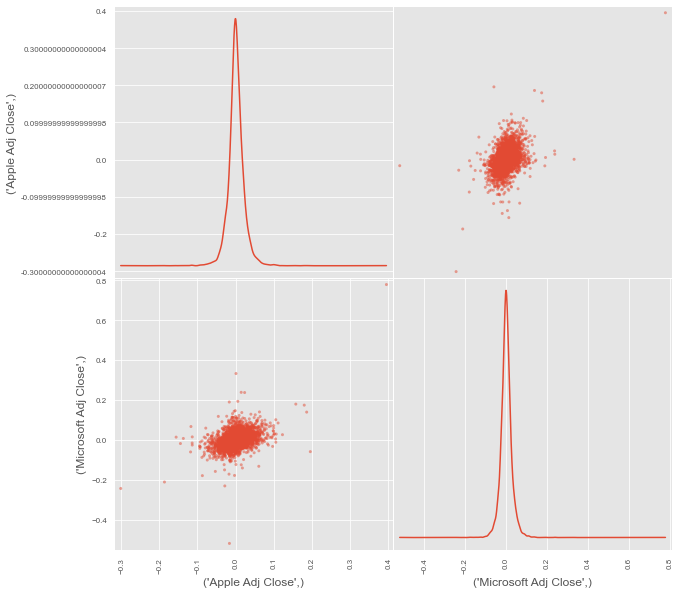

In [335]:
from pandas.plotting import scatter_matrix

df_adj = pd.concat([df_microsoft['Adj Close'], df_apple['Adj Close']], axis=1)
df_adj.columns = [['Apple Adj Close', 'Microsoft Adj Close']]
scatter_matrix(df_adj.pct_change(), diagonal='kde', figsize=(10, 10))

## Check the Expected Returns and Risk

(0.015, 0.035)

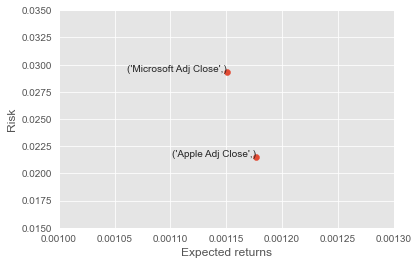

In [336]:
pct_change = df_adj.pct_change()
plt.scatter(pct_change.mean(), pct_change.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(pct_change.columns, pct_change.mean(), pct_change.std()):
    plt.text(x, y, label, ha='right')
plt.xlim([0.001, 0.0013])
plt.ylim([0.015, 0.035])

## Predict the trend of adjusted price

In [5]:
# copy the original data
df_reg_apple = df_apple.copy().loc[:, ['Adj Close', 'Volume']]
df_reg_microsoft = df_microsoft.copy().loc[:, ['Adj Close', 'Volume']]

# define HL_PCT
df_reg_apple['HL_PCT'] = ((df_apple['High'] - df_apple['Low']) / df_apple['Close']) * 100.0
df_reg_microsoft['HL_PCT'] = ((df_microsoft['High'] - df_microsoft['Low']) / df_microsoft['Close']) * 100.0

# define PCT_change
df_reg_apple['PCT_change'] = (df_apple['Close'] - df_apple['Open']) / df_apple['Open'] * 100.0
df_reg_microsoft['PCT_change'] = (df_microsoft['Close'] - df_microsoft['Open']) / df_microsoft['Open'] * 100.0


In [338]:
df_reg_apple

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
1980-12-12,0.100039,469033600,0.434756,0.000000
1980-12-15,0.094820,175884800,0.458685,-0.456591
1980-12-16,0.087861,105728000,0.495019,-0.492580
1980-12-17,0.090035,86441600,0.483063,0.000000
1980-12-18,0.092646,73449600,0.469452,0.000000
...,...,...,...,...
2022-08-01,161.285965,67829400,1.671721,0.310540
2022-08-02,159.788040,59907000,1.737391,-0.056222
2022-08-03,165.899567,82507500,3.515317,3.288989


In [339]:
df_reg_microsoft

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
1986-03-13,0.061109,1031788800,13.393059,9.803257
1986-03-14,0.063292,308160000,5.173099,3.571208
1986-03-17,0.064384,133171200,2.543175,1.725028
1986-03-18,0.062746,67766400,4.348567,-2.543175
1986-03-19,0.061655,47894400,3.539606,-1.739026
...,...,...,...,...
2022-08-01,278.010010,21539600,1.956765,0.068391
2022-08-02,274.820007,22754200,2.004952,-0.427534
2022-08-03,282.470001,23518900,2.439202,2.063156


In [12]:
df_reg_apple = df_reg_apple['2005-1-1':'2022-8-1']
df_reg_microsoft = df_reg_microsoft['2005-1-1':'2022-8-1']

x_apple = df_reg_apple.iloc[:, 1:4].values
x_microsoft = df_reg_microsoft.iloc[:, 1:4].values

y_apple = df_reg_apple['Adj Close'].values
y_microsoft = df_reg_microsoft['Adj Close'].values

# preprocessing
x_apple = MinMaxScaler().fit_transform(x_apple)
x_microsoft = MinMaxScaler().fit_transform(x_microsoft)

# train test split
x_apple_train, x_apple_test, y_apple_train, y_apple_test = train_test_split(x_apple,y_apple,
                                                                            test_size=0.01,
                                                                            random_state=17,
                                                                            shuffle=True)

x_microsoft_train, x_microsoft_test, y_microsoft_train, y_microsoft_test = train_test_split(x_microsoft, y_microsoft,
                                                                                            test_size=0.01,
                                                                                            random_state=17,
                                                                                            shuffle=True
                                                                                            )


In [9]:
df_reg_apple

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2005-01-03,0.964983,691992000,3.965920,-2.300080
2005-01-04,0.974894,1096810400,3.909927,0.235184
2005-01-05,0.983432,680433600,1.860502,0.062116
2005-01-06,0.984194,705555200,2.447689,-0.185483
2005-01-07,1.055854,2227450400,7.046944,6.538475
...,...,...,...,...
2022-07-26,151.389725,55138700,1.510549,-0.433462
2022-07-27,156.572510,78620700,3.297403,2.759202
2022-07-28,157.131744,81378700,2.052745,0.235705


In [13]:
y_apple

array([  0.964983,   0.974894,   0.983432, ..., 157.131744, 162.284576,
       161.285965])

In [341]:
# Train the 7 modelS with Apple data
modelSVR_apple = SVR().fit(x_apple_train, y_apple_train)
modelRFR_apple = RandomForestRegressor().fit(x_apple_train, y_apple_train)
modelABR_apple = AdaBoostRegressor().fit(x_apple_train, y_apple_train)
modelGBR_apple = GradientBoostingRegressor().fit(x_apple_train, y_apple_train)
modelLR_apple = LinearRegression(n_jobs=-1).fit(x_apple_train, y_apple_train)
modelDTR_apple = DecisionTreeRegressor().fit(x_apple_train, y_apple_train)
modelKNR_apple = KNeighborsRegressor(n_neighbors=3).fit(x_apple_train, y_apple_train)

In [342]:
rank = {'SVR': modelSVR_apple.score(x_apple_test, y_apple_test),
        'RandomForestRegressor': modelRFR_apple.score(x_apple_test, y_apple_test),
        'AdaBoostRegressor': modelABR_apple.score(x_apple_test, y_apple_test),
        'GradientBoostingRegressor': modelGBR_apple.score(x_apple_test, y_apple_test),
        'LinearRegression': modelLR_apple.score(x_apple_test, y_apple_test),
        'DecisionTreeRegressor': modelDTR_apple.score(x_apple_test, y_apple_test),
        'KNeighborsRegressor': modelKNR_apple.score(x_apple_test, y_apple_test)}

print('SVR:', modelSVR_apple.score(x_apple_test, y_apple_test))
print('RandomForestRegressor:', modelRFR_apple.score(x_apple_test, y_apple_test))
print('AdaBoostRegressor:', modelKNR_apple.score(x_apple_test, y_apple_test))
print('GradientBoostingRegressor:', modelGBR_apple.score(x_apple_test, y_apple_test))
print('LinearRegression:', modelLR_apple.score(x_apple_test, y_apple_test))
print('DecisionTreeRegressor:', modelDTR_apple.score(x_apple_test, y_apple_test))
print('KNeighborsRegressor:', modelKNR_apple.score(x_apple_test, y_apple_test))

SVR: 0.3715413314502557
RandomForestRegressor: 0.8553473024508813
AdaBoostRegressor: 0.9213522485516759
GradientBoostingRegressor: 0.8748185702810507
LinearRegression: 0.4484733341024195
DecisionTreeRegressor: 0.7340364598732081
KNeighborsRegressor: 0.9213522485516759


## predict the adj close by date

In [177]:
df_reg_apple = df_apple.copy().loc[:, ['Adj Close']]
df_reg_apple = df_reg_apple['2005-1-1':'2022-9-1']
df_reg_apple = df_reg_apple.iloc[:,[0]].reset_index(drop=True)
y_apple_volume = df_reg_apple.values
x_apple_volume = df_reg_apple.index.values.reshape(-1, 1)
print(df_reg_apple)
x_apple_train, x_apple_test, y_apple_train, y_apple_test = train_test_split(x_apple_volume,y_apple_volume,
                                                                            test_size=0.01,
                                                                            random_state=19,
                                                                            shuffle=True)

       Adj Close
0       0.964983
1       0.974894
2       0.983432
3       0.984194
4       1.055854
...          ...
4171  161.285965
4172  159.788040
4173  165.899567
4174  165.580002
4175  165.350006

[4176 rows x 1 columns]


In [183]:
df_reg_microsoft = df_microsoft.copy().loc[:, ['Adj Close']]
df_reg_microsoft = df_reg_microsoft['2005-1-1':'2022-9-1']
df_reg_microsoft = df_reg_microsoft.iloc[:,[0]].reset_index(drop=True)
y_microsoft_volume = df_reg_microsoft.values
x_microsoft_volume = df_reg_microsoft.index.values.reshape(-1, 1)
print(df_reg_microsoft)
x_microsoft_train, x_microsoft_test, y_microsoft_train, y_microsoft_test = train_test_split(x_microsoft_volume,y_microsoft_volume,
                                                                            test_size=0.01,
                                                                            random_state=19,
                                                                            shuffle=True)

       Adj Close
0      18.954119
1      19.025005
2      18.982471
3      18.961212
4      18.904505
...          ...
4171  278.010010
4172  274.820007
4173  282.470001
4174  283.649994
4175  282.910004

[4176 rows x 1 columns]


In [184]:
modelSVR_apple = SVR().fit(x_apple_train, y_apple_train)
modelRFR_apple = RandomForestRegressor().fit(x_apple_train, y_apple_train)
modelABR_apple = AdaBoostRegressor().fit(x_apple_train, y_apple_train)
modelGBR_apple = GradientBoostingRegressor().fit(x_apple_train, y_apple_train)
modelLR_apple = LinearRegression(n_jobs=-1).fit(x_apple_train, y_apple_train)
modelDTR_apple = DecisionTreeRegressor().fit(x_apple_train, y_apple_train)
modelKNR_apple = KNeighborsRegressor(n_neighbors=3).fit(x_apple_train, y_apple_train)      

print('SVR:', modelSVR_apple.score(x_apple_test, y_apple_test))
print('RandomForestRegressor:', modelRFR_apple.score(x_apple_test, y_apple_test))
print('AdaBoostRegressor:', modelKNR_apple.score(x_apple_test, y_apple_test))
print('GradientBoostingRegressor:', modelGBR_apple.score(x_apple_test, y_apple_test))
print('LinearRegression:', modelLR_apple.score(x_apple_test, y_apple_test))
print('DecisionTreeRegressor:', modelDTR_apple.score(x_apple_test, y_apple_test))
print('KNeighborsRegressor:', modelKNR_apple.score(x_apple_test, y_apple_test))

c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ormosia5\AppData\Local\Temp\ipykernel_79936\3404906299.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRFR_apple = RandomForestRegressor().fit(x_apple_train, y_apple_train)
c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:570

SVR: 0.8568484900687312
RandomForestRegressor: 0.9986633642819596
AdaBoostRegressor: 0.998656414684276
GradientBoostingRegressor: 0.9963318470780663
LinearRegression: 0.5590155528570071
DecisionTreeRegressor: 0.9986140104113606
KNeighborsRegressor: 0.998656414684276


In [185]:
modelSVR_microsoft = SVR().fit(x_microsoft_train, y_microsoft_train)
modelRFR_microsoft = RandomForestRegressor().fit(x_microsoft_train, y_microsoft_train)
modelABR_microsoft = AdaBoostRegressor().fit(x_microsoft_train, y_microsoft_train)
modelGBR_microsoft = GradientBoostingRegressor().fit(x_microsoft_train, y_microsoft_train)
modelLR_microsoft = LinearRegression(n_jobs=-1).fit(x_microsoft_train, y_microsoft_train)
modelDTR_microsoft = DecisionTreeRegressor().fit(x_microsoft_train, y_microsoft_train)
modelKNR_microsoft = KNeighborsRegressor(n_neighbors=3).fit(x_microsoft_train, y_microsoft_train)      

print('SVR:', modelSVR_microsoft.score(x_microsoft_test, y_microsoft_test))
print('RandomForestRegressor:', modelRFR_microsoft.score(x_microsoft_test, y_microsoft_test))
print('AdaBoostRegressor:', modelKNR_microsoft.score(x_microsoft_test, y_microsoft_test))
print('GradientBoostingRegressor:', modelGBR_microsoft.score(x_microsoft_test, y_microsoft_test))
print('LinearRegression:', modelLR_microsoft.score(x_microsoft_test, y_microsoft_test))
print('DecisionTreeRegressor:', modelDTR_microsoft.score(x_microsoft_test, y_microsoft_test))
print('KNeighborsRegressor:', modelKNR_microsoft.score(x_microsoft_test, y_microsoft_test))

c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ormosia5\AppData\Local\Temp\ipykernel_79936\3102763711.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRFR_microsoft = RandomForestRegressor().fit(x_microsoft_train, y_microsoft_train)
c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensembl

SVR: 0.8953675425250225
RandomForestRegressor: 0.9996744343021524
AdaBoostRegressor: 0.9997362739422134
GradientBoostingRegressor: 0.9988201171900535
LinearRegression: 0.5533535744637091
DecisionTreeRegressor: 0.9996447954373319
KNeighborsRegressor: 0.9997362739422134


In [186]:
# predict the next day adj close
apple_pred = modelRFR_apple.predict([[4176]])
microsoft_pred = modelRFR_microsoft.predict([[4176]])

print(apple_pred)
print(microsoft_pred)

[165.43907439]
[282.82980157]
